![Futuristic electric car charging](ev_charging.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, understanding trends in charging facilities and sales is essential to inform strategic planning.

As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. 
___

### The Data
&nbsp;

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [112]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Loading Data
private = pd.read_csv('private_ev_charging.csv')
public = pd.read_csv('public_ev_charging.csv')
sales = pd.read_csv('ev_sales.csv')

In [114]:
# Joining Private & Public DataFrames
priv_pub = private.merge(public, how='outer', on='year', indicator=True)
priv_pub_filtered = priv_pub[priv_pub['_merge'] == 'both']
priv_pub_final = priv_pub_filtered.drop('_merge', axis=1)
priv_pub_final.head()

,year,private_ports,private_station_locations,public_ports,public_station_locations
0,2014,3695.0,1825.0,22470,9207
1,2015,4150.0,1962.0,26532,10710
2,2016,5763.0,2331.0,33165,13150
3,2017,6048.0,2370.0,45789,16170
4,2018,6812.0,2489.0,56842,19893


In [115]:
# Joining Sales DataFrame
sales_agg = sales.groupby('year')['sales'].sum().reset_index()
all_data = priv_pub_final.merge(sales_agg, how='left', on='year')
all_data = all_data.dropna(subset='sales')

In [116]:
# How many vehicles were sold in 2018 in total?
ev_sales_2018 = int(all_data[all_data['year'] == 2018]['sales'])
ev_sales_2018

361315

'same'

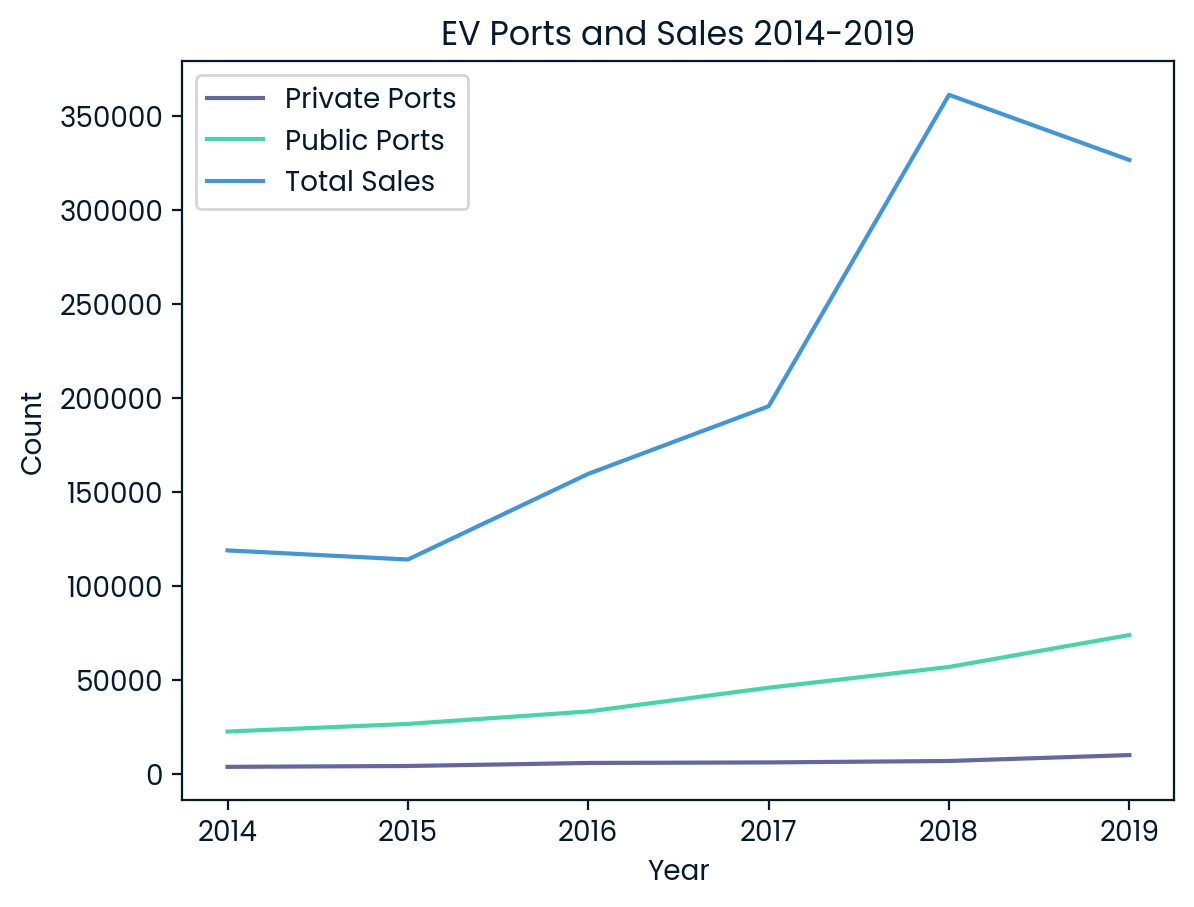

In [117]:
# Trends
fig, ax = plt.subplots()
sns.lineplot(data=all_data, x='year', y='private_ports', label='Private Ports')
sns.lineplot(data=all_data, x='year', y='public_ports', ax=ax, label='Public Ports')
sns.lineplot(data=all_data, x='year', y='sales', ax=ax, label='Total Sales')
ax.set(xlabel='Year', ylabel='Count', title='EV Ports and Sales 2014-2019')

trend='same'
trend